# Problem 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma, factorial,beta,betainc,betaincinv

In [2]:
np.random.seed(100)

In [3]:
def newton(F,f,iters=20000):
    """
    returns x so that
    F(x)=0
    where 
    F'(x)=f
    
    """
    x=0.5

    for i in range(iters):
        
        x-=F(a,b,x)/f(a,b,x)
    return x



In [4]:
p=0.3 #set p
a,b=5,5 #set alpha and beta
F=lambda a,b,x: betainc(a,b,x)-(1-p)
f=lambda a,b,x: np.power(x,(a-1))*np.power((1-x),(b-1))/beta(a,b)

x=newton(F,f,200000)

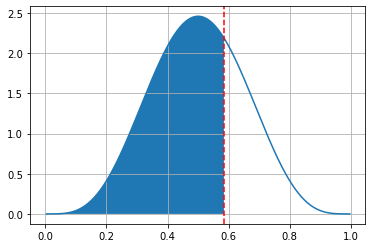

In [5]:
X=np.linspace(1/300,1,300,endpoint=False)
plt.plot(X,[f(a,b,y) for y in X])
section = np.linspace(0, x, 300)
plt.fill_between(section,[f(a,b,y) for y in section])
plt.axvline(x=x,color="red", linestyle="--")
plt.grid()

In [6]:
def pull(p):
    """
    Bernoulli throw
    """
    return int(np.random.random()<p)

1% plotted


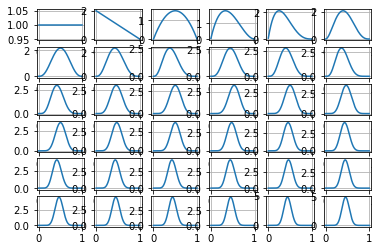

left 99% on background


In [7]:
s=6
n=s*s

t=0
w=0
P=[]
fig, axs = plt.subplots(s, s)
print("1% plotted")
for step in range(n):
    a,b=1+w,1+t-w
    X=np.linspace(1/300,1,300,endpoint=False)
    axs[step//s][step%s].plot(X,[f(a,b,y) for y in X])
    axs[step//s][step%s].grid()
    
    y=pull(p)
    t+=1
    w+=y
    P.append(a/(a+b))
plt.show()
print("left 99% on background")
for step in range(n*99):
    a,b=1+w,1+t-w
    y=pull(p)
    t+=1
    w+=y
    P.append(a/(a+b))
    

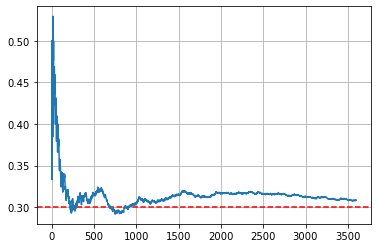

In [8]:
plt.axhline(y=p,color="red", linestyle="--")
plt.plot(P)
plt.grid()
plt.show()

In [9]:
pe=a/(a+b)
print("experimental {:.4f} real {}".format(pe,p))

experimental 0.3085 real 0.3


In [10]:
E=list(map(lambda x:(x-p)**2,P))

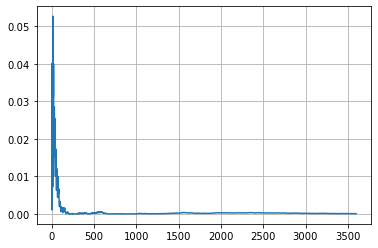

In [11]:
plt.plot(E)
plt.grid()
plt.show()

1% plotted


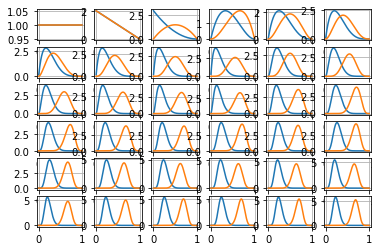

left 99% on background


In [12]:
s=6
n=s*s

t=[0,0]
w=[0,0]
P=[]
probs=[0.3,0.7]
A=[0,0]
B=[0,0]
fig, axs = plt.subplots(s, s)
print("1% plotted")
for step in range(n):
    for i in range(len(t)):
        A[i],B[i]=1+w[i],1+t[i]-w[i]
        X=np.linspace(1/300,1,300,endpoint=False)
        axs[step//s][step%s].plot(X,[f(A[i],B[i],y) for y in X])
        
    
        y=pull(probs[i])
        t[i]+=1
        w[i]+=y
    axs[step//s][step%s].grid()
    P.append([a/(a+b) for a,b in zip(A,B)])
plt.show()
print("left 99% on background")
for step in range(n*99):
    for i in range(len(t)):
        A[i],B[i]=1+w[i],1+t[i]-w[i]
        
        
    
        y=pull(probs[i])
        t[i]+=1
        w[i]+=y

    P.append([a/(a+b) for a,b in zip(A,B)])

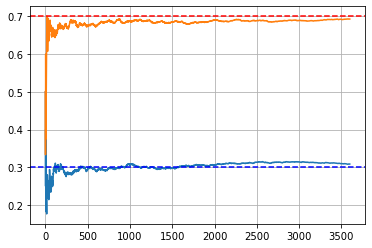

In [13]:
plt.plot(P)
plt.grid()
plt.axhline(y=probs[0],color="blue", linestyle="--")
plt.axhline(y=probs[1],color="red", linestyle="--")

In [14]:
error1=abs(P[-1][0]-probs[0]),abs(P[-1][1]-probs[1])

In [15]:

t=[0,0]
w=[0,0]
total_reward=0
average_reward=[[],[]]
probs=[0.3,0.7]
for steps in range(100*n):
    ad = 0
    max_upper_bound = 0
    for i in range( 2):
        if (t[i] > 0):
            average_reward[i].append(w[i] / t[i])
            delta_i = np.sqrt(2 * np.log(steps+1) / t[i])
            upper_bound = average_reward[i][-1] + delta_i
        else:
            upper_bound = float('inf')
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    t[ad] += 1
    reward = pull(probs[ad])
    w[ad] += reward
    total_reward += reward

In [16]:
error2=abs(probs[0]-average_reward[0][-1]),abs(probs[1]-average_reward[1][-1])

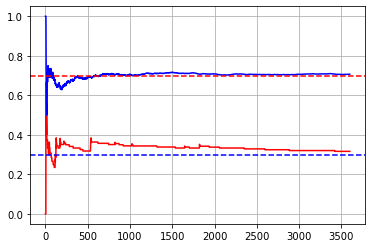

In [17]:
plt.grid()
plt.plot(average_reward[0],'r')
plt.plot(average_reward[1],'b')
plt.axhline(y=probs[0],color="blue", linestyle="--")
plt.axhline(y=probs[1],color="red", linestyle="--")

In [18]:

t=[0,0]
w=[0,0]
total_reward=0
average_reward=[[],[]]
probs=[0.3,0.7]
eps=0.05
for steps in range(100*n):
    if np.random.random()<eps:
        i=np.random.randint(0,1)
    else:
        
        m=-float('inf')
        for j in range(len(probs)):
            if len(average_reward[j]) ==0:
                if  m<=0:
                    i=j
            else:
                if m<np.mean(average_reward[j]):
                    m=np.mean(average_reward[j])
                    i=j
                
    average_reward[i].append(pull(probs[i]))
P=[[np.mean(average_reward[i][:j]) for j in range(2,100*n)] for i in range(2)]

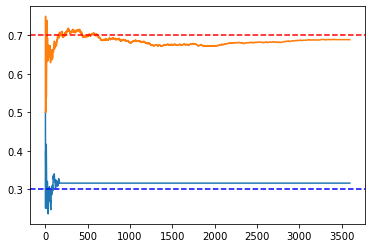

In [19]:
plt.plot(P[0])
plt.plot(P[1])
plt.axhline(y=probs[0],color="blue", linestyle="--")
plt.axhline(y=probs[1],color="red", linestyle="--")

In [20]:
error3=abs(probs[0]-P[0][-1]),abs(probs[1]-P[1][-1])

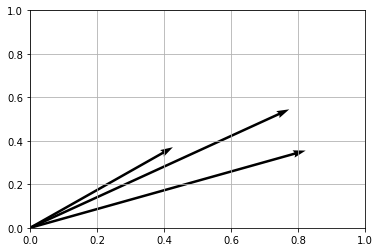

In [21]:
plt.quiver([0,0,0],[0,0,0],[error1[0],error2[0],error3[0]],[error1[1],error2[1],error3[1]] , angles='xy', scale_units='xy',scale=0.02)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.show()

In [22]:
for e in ["error1","error2","error3"]:
    print("the method {} has error {:.4f}".format(e,np.linalg.norm(eval(e))))

the method error1 has error 0.0113
the method error2 has error 0.0179
the method error3 has error 0.0189


Compared to the thompson algorithm, the greedy epsilon method and the UCB algorithm have worse behavior, that is, the thompsom method is the one that best estimates the probabilities compared to the other two.